## Bike Sharing Demand - Multiple Linear Regression 

#### Problem Statement:

US bike-sharing provider **BoomBikes** suffered dipsin revenue due to the ongoing corona pandamic. To sustain in current market scenario company decided to come up with mindfull buisness plan, to accelerate revenue. 

Company contracted a consulting company to understand factors which demand of bike is dependant. Here company want to understand the factors affecting on the demand of these shared bikes in American market

**Objective:**
- BoomBikes Company wants to know:

1) Which variables are significant in predicting the shared bike demand.
2) How well those variable describe the shared bike demand.

=======================================================================================================

#### Approach:

***Understanding Problem-***

***Understanding Data Dictionary-***
1) Import Required Libraries
2) Basic Data Understanding
3) Categorical values name changing
4) Exloratory Data Analysis
5) Selection of Prediction Method
6) Splitting Data: Test & Train set
7) Rescalling Data
8) Dividing train dataset into X and Y for model building
9) Building Model- Multiple Linear Regression
10) Residual Analysis
11) Making Prediction
12) Model Evaluation
13) Regression Equation
14) Model Explaination
14) Recommendations

===========================================================================================================

#### Data Dictionary:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
    
    ==========================================================================================================

### 1.Import Required Libraries

In [1]:
# Import Basic liabrary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [2]:
# Import liabrary for Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 2. Basic Data Understanding

In [3]:
# open dataset

df = pd.read_csv ('day.csv')

In [4]:
# Checking dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# To know Rows and Columns
df.shape

(730, 16)

In [6]:
# basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Obbservation:  There is no any null values in dataset.

In [7]:
# Basic Statistics
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Check Duplicate
df_duplicate = df.copy()

df_duplicate.drop_duplicates (subset=None, inplace=True)
df_duplicate.shape

(730, 16)

💡Insight: No duplicate values found in dataset, bcause same rows & columns are present in duplicate dataset

In [9]:
# unique values in every columns, to know type of columns (Numerical Or Chategorical)
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [10]:
# Changing Column Name for better understanding and labeling
df.rename(columns= {'yr': 'year', 'mnth': 'month'}, inplace=True)

In [11]:
# Ckecked wheather columns name changed or not
df.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### 3.Categorical values name changing 

In [12]:
# Chategorical values changing name for modelling

df['season']=df['season'].map ({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['month']=df['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec' })
df['weekday']= df['weekday'].map({0:'Sunday', 1:'Monday', 2: 'Tuesday', 3:'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df['weathersit'] = df['weathersit'].map({1:'Clear_PartlyCloudy', 2:'Mist_Cloudy', 3:'Light_Snow_Rain', 4: 'Heavy_Rain'}) 


In [13]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Monday,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tuesday,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wednesday,1,Clear_PartlyCloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thursday,1,Clear_PartlyCloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Friday,1,Clear_PartlyCloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 4.Exloratory Data Analysis

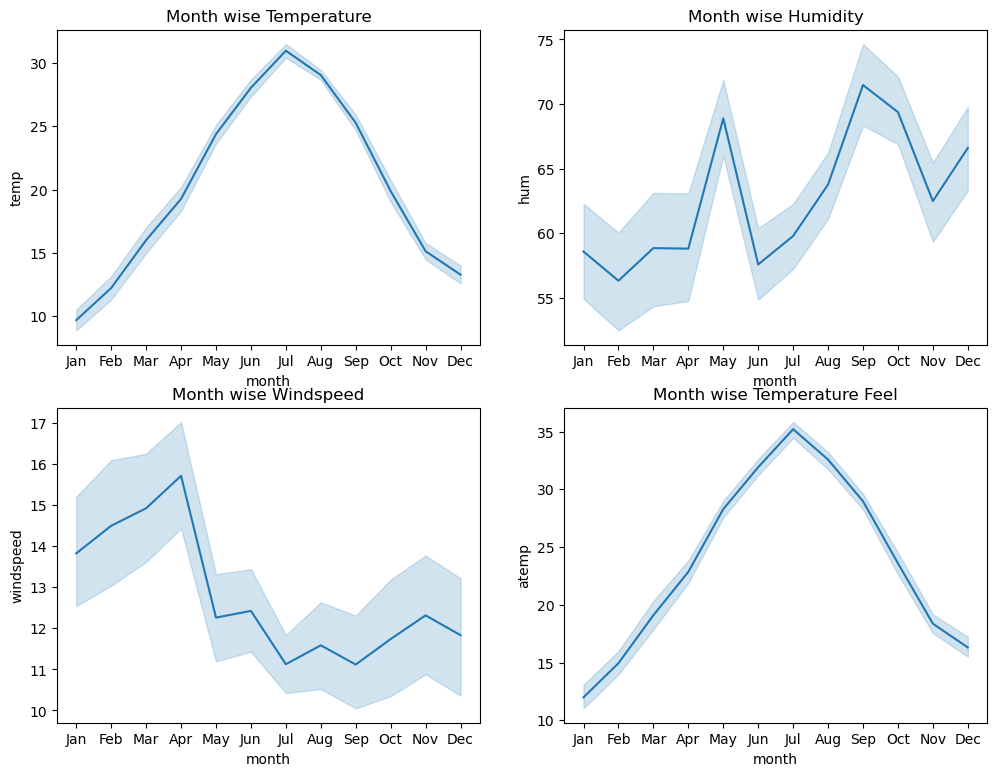

In [14]:
# All Weather parameter with month wise to know changes
plt.figure (figsize= (12,9))

plt.subplot(2,2,1)
sns.lineplot (data=df, x='month', y='temp')
plt.title ('Month wise Temperature')

plt.subplot(2,2,2)
sns.lineplot (data=df, x='month', y='hum')
plt.title ('Month wise Humidity')

plt.subplot(2,2,3)
sns.lineplot (data=df, x='month', y='windspeed')
plt.title ('Month wise Windspeed')

plt.subplot(2,2,4)
sns.lineplot (data=df, x='month', y='atemp')

plt.title ('Month wise Temperature Feel')
plt.show()

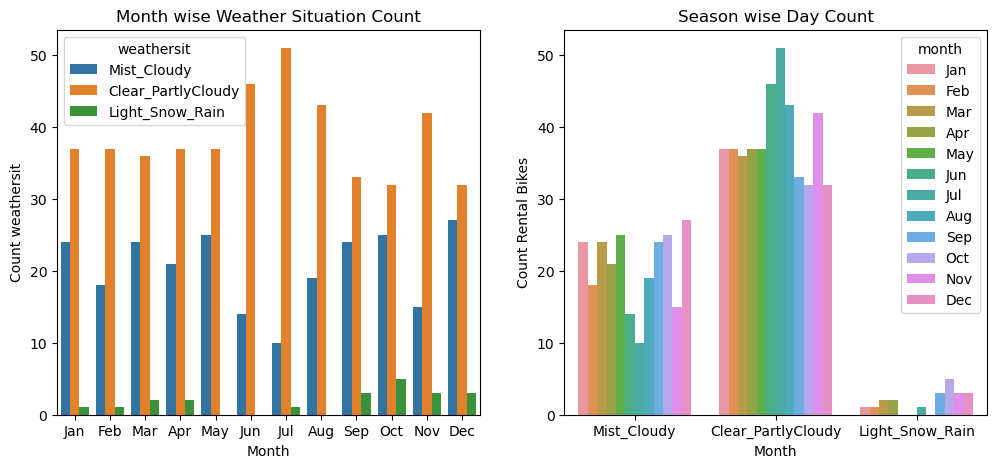

In [15]:
# Month and Season wise Weather 
plt.figure (figsize= (12,5))
plt.subplot(1,2,1)
sns.countplot (data=df, x='month', hue='weathersit')
plt.xlabel ('Month')
plt.ylabel ('Count weathersit')
plt.title ('Month wise Weather Situation Count')

plt.subplot(1,2,2)
#df.groupby('month')[['casual', 'registered', 'cnt']].sum().plot.bar()
sns.countplot (data=df, x='weathersit', hue='month')
plt.xlabel ('Month')
plt.ylabel ('Count Rental Bikes')
plt.title ('Season wise Day Count')

plt.show()

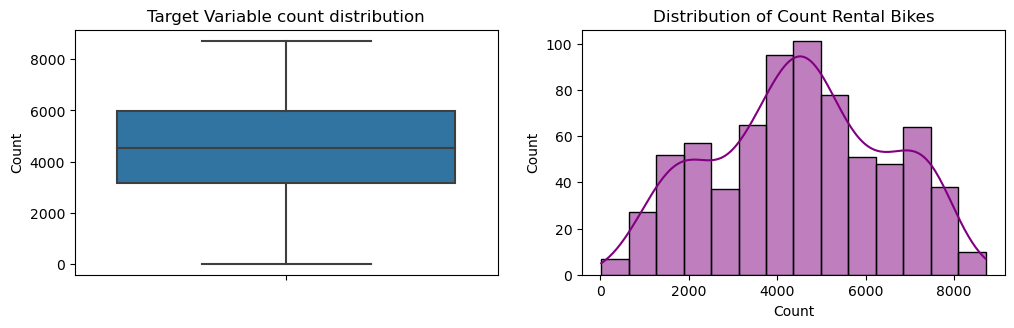

In [16]:
# Unerstading Target Variable
plt.figure (figsize= (12,7))

plt.subplot(2,2,1)
sns.boxplot (data=df, y='cnt')
plt.ylabel('Count')
plt.title ('Target Variable count distribution')

plt.subplot(2, 2, 2)
sns.histplot(data=df, x='cnt',kde=True, color='purple')
plt.xlabel('Count')
plt.title('Distribution of Count Rental Bikes')

plt.show()

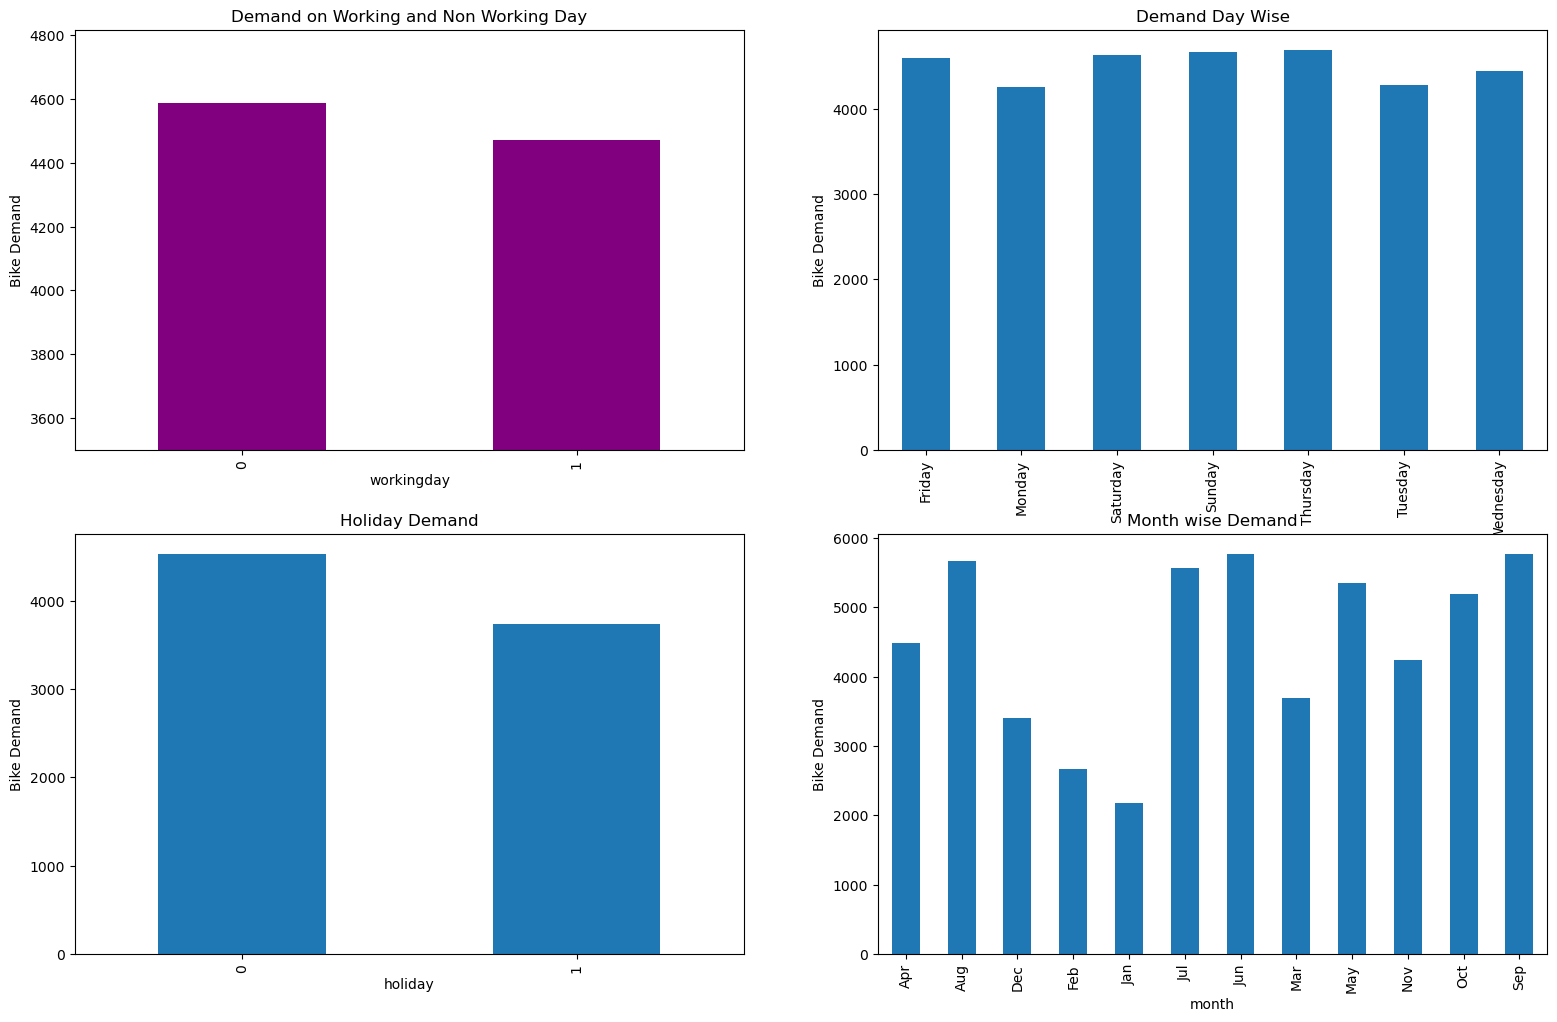

In [17]:
# Understanding effect of chategorical variables on rental bike count
plt.figure(figsize= (19,12))
plt.subplot(2,2,1)
df.groupby ('workingday')['cnt'].mean().plot.bar(color='purple')
plt.title('Demand on Working and Non Working Day')
plt.ylabel('Bike Demand')
plt.ylim(3500)

plt.subplot(2,2,2)
df.groupby('weekday')['cnt'].mean().plot.bar()
plt.title('Demand Day Wise')
plt.ylabel('Bike Demand')


plt.subplot(2,2,3)
df.groupby('holiday')['cnt'].mean().plot.bar()
plt.title('Holiday Demand')
plt.ylabel('Bike Demand')


plt.subplot(2,2,4)
df.groupby('month')['cnt'].mean().plot.bar()
plt.title('Month wise Demand')
plt.ylabel('Bike Demand')
plt.show()

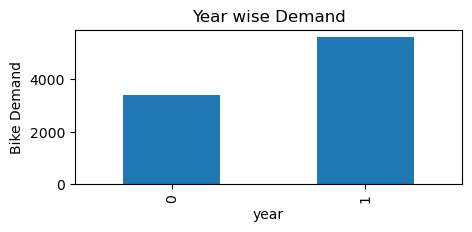

In [18]:
# Year wise Demand
plt.figure(figsize=(5,2))
df.groupby('year')['cnt'].mean().plot.bar() 
plt.title('Year wise Demand')
plt.ylabel('Bike Demand')
plt.show()

Observation:
- Year- The bike rental count has increased in 2019 compared to 2018.
- Holiday: When it's a holiday (Holiday = 1), the demand is found lower compared to non-holidays.
- Season: Highest bike rental in winter and lower in spring season.
- Month: In May to October bike rental demand is high. In September having maximum customer.
- Weather Situation: Demand is higher when the weather is clear.
- Weekday: No big change in bike hire demand on specific weekdays.

In [19]:
# Dropping Columns
df.drop (columns=['instant', 'dteday','casual', 'registered'], inplace=True)

In [20]:
# Column Name checked deleted or not
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [21]:
# Checking dataset
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear_PartlyCloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear_PartlyCloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear_PartlyCloudy,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
# Selecting Numerical columns for pairplot
num_col = df.select_dtypes (include='number')
num_col.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')

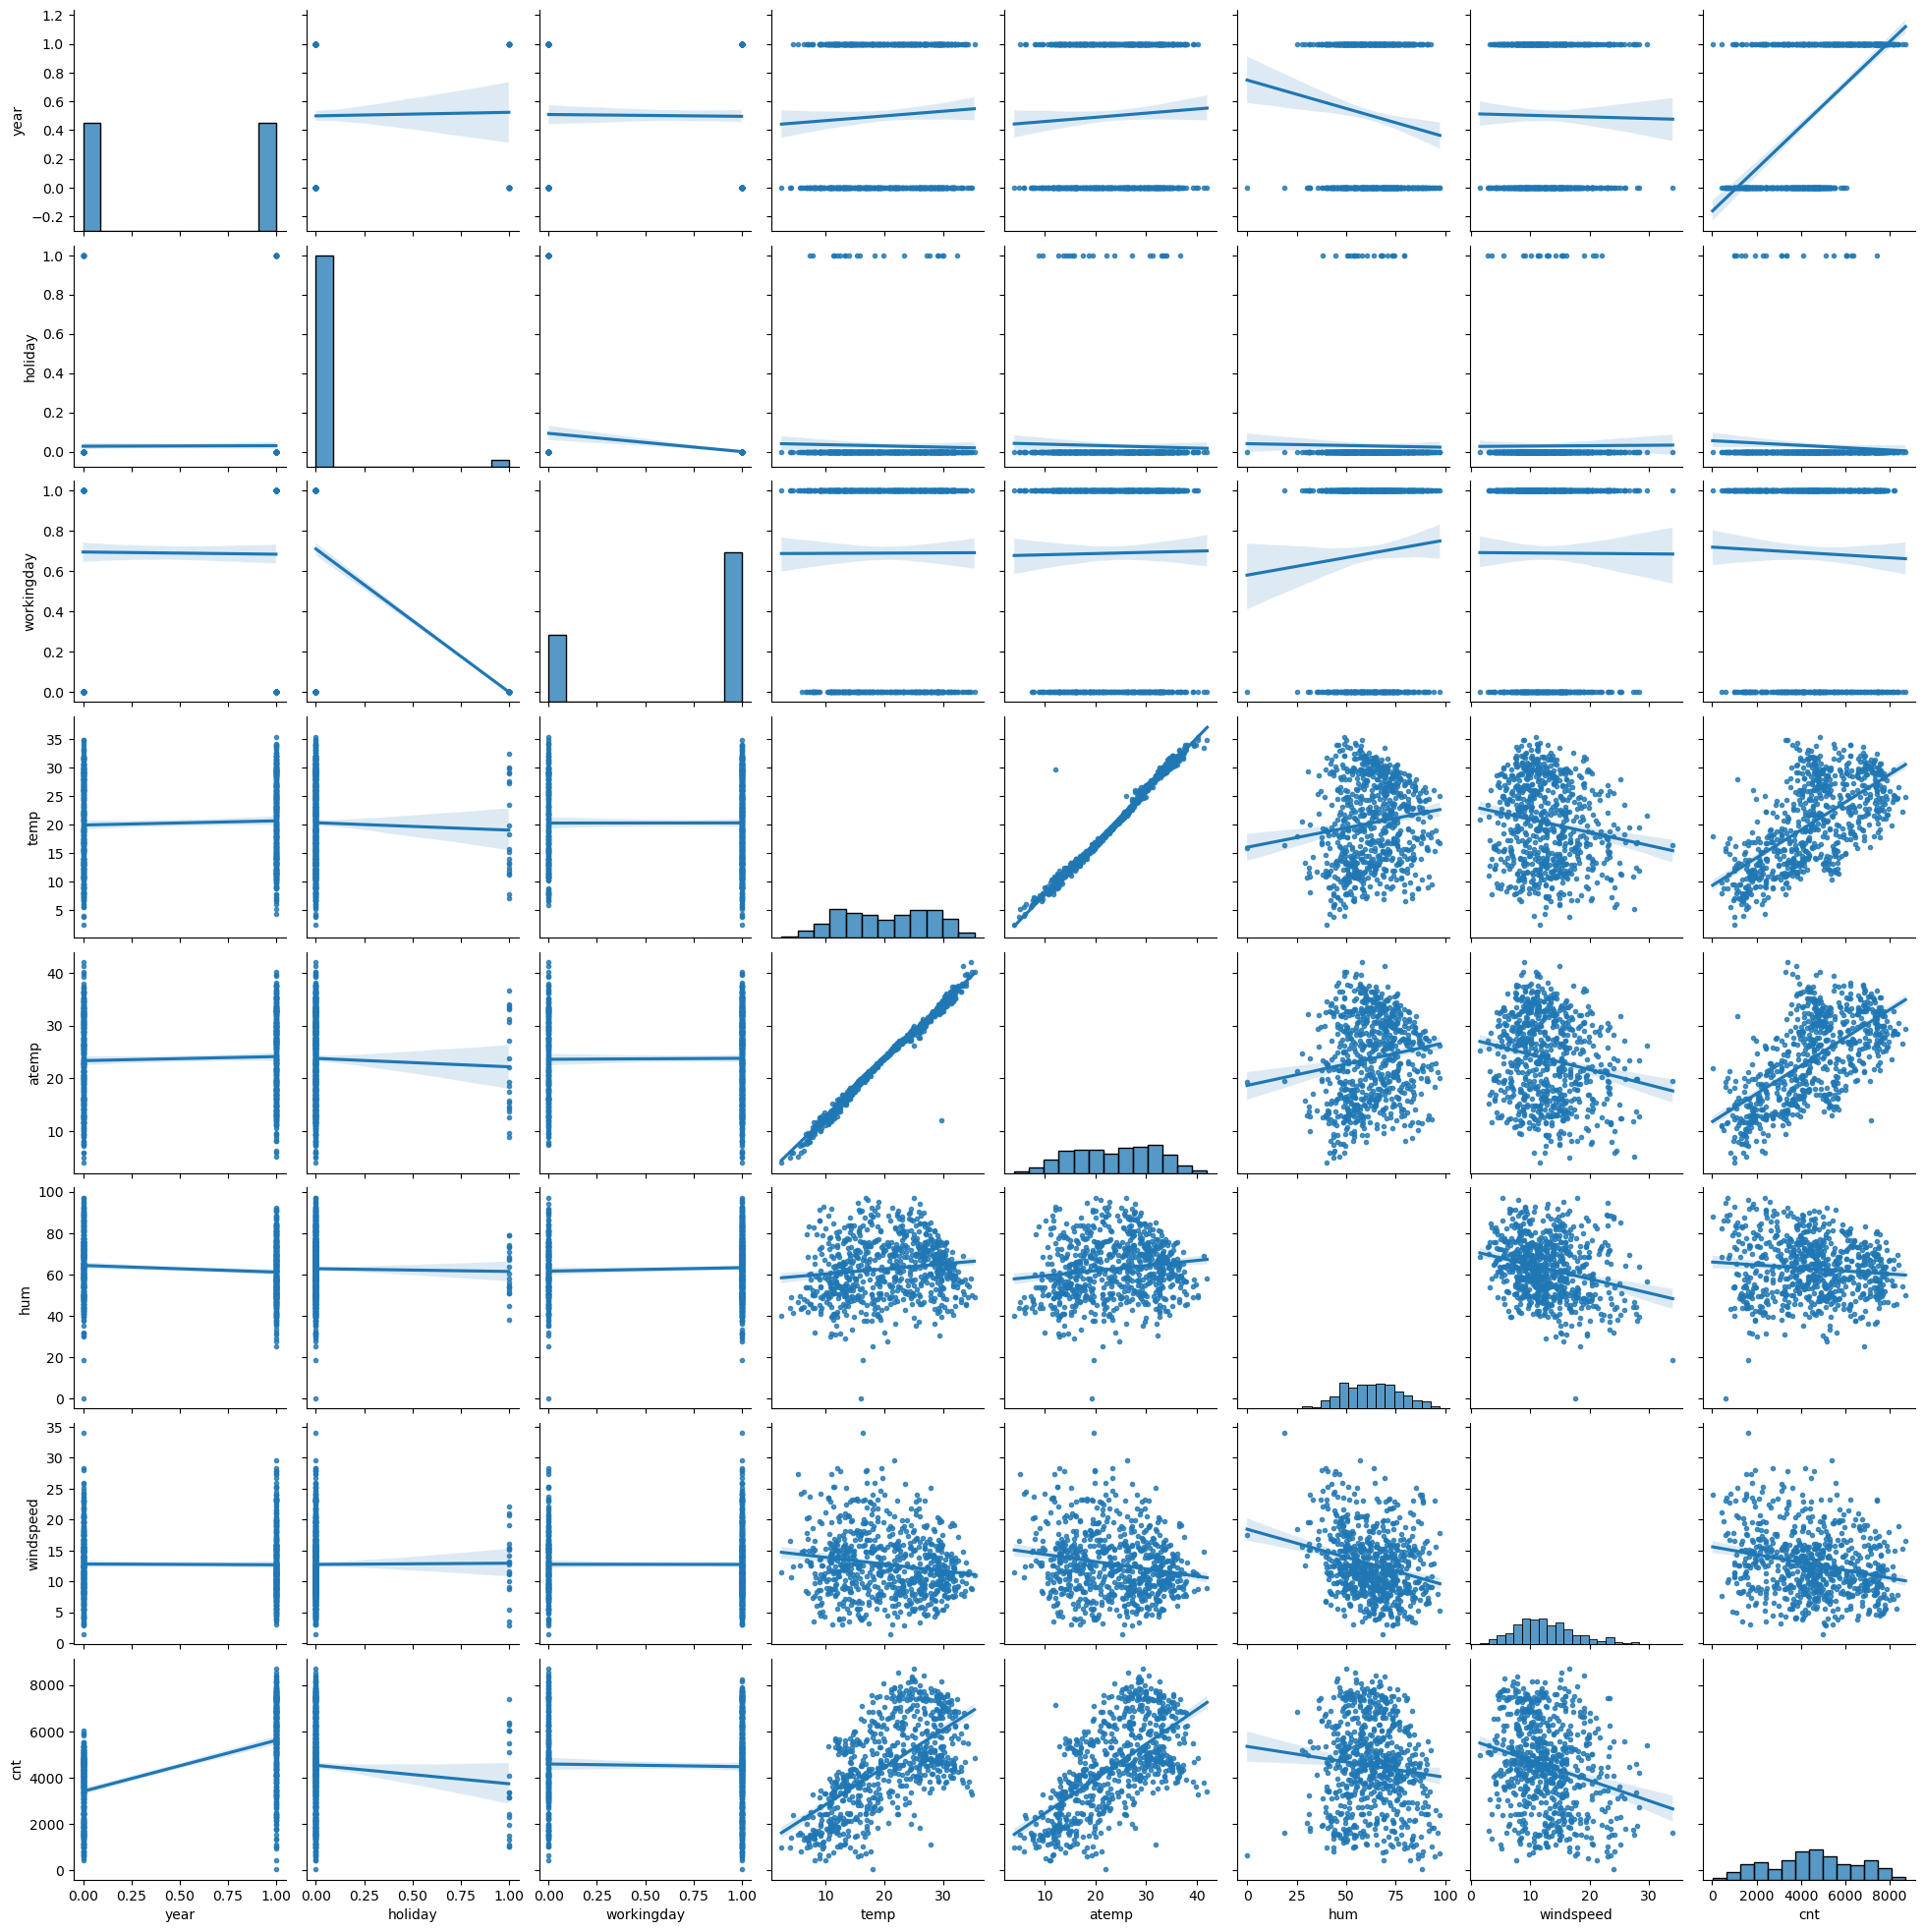

In [23]:
# Checking correlation with variable to take decision for model selection
sns.pairplot (df, kind='reg', markers='.')
plt.show()

Observation: 
   - Count ('cnt')/Target variable is correlated with temp, atemp positively
   - Count ('cnt')/Target variable is correlated with hum, windspeed negatively

### 5. Selection of Prediction Method

**Machine Learning-**
- Target variable ('cnt') is positively  correlate with temp, atemp and and negativly hum, windspeed 

**Type of Machine Learning-**
- Supervised Claasification- Because there is Target variable ('cnt') present

**Multiple Linear Regression Problem-** 
- Target variable ('cnt') is continuouse
- Multible independant varible available or Target feature depend on multiple varibles.

#### Create Dummy Variable-

In [24]:
# For Solving Machine Learining problem need to create Dummy Varible
# Because there are binary and categorical columns/varible present

In [25]:
# Creating Copy from main dataframe for performing ML operation
df_ml = df.copy()

In [26]:
# Using this datset for ML
df_ml.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear_PartlyCloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear_PartlyCloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear_PartlyCloudy,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
# Creating Dummy Varible >> season, month, weekday, weathersit.

season_dummy= pd.get_dummies (df_ml ['season'], drop_first=True, dtype= 'int64')
month_dummy =pd.get_dummies (df_ml ['month'], drop_first= True, dtype='int64')
weekday_dummy =pd.get_dummies (df_ml ['weekday'], drop_first= True, dtype='int64')
weathersit_dummy = pd.get_dummies (df_ml['weathersit'], drop_first= True, dtype='int64')

In [28]:
# Checking dataframe
season_dummy

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [29]:
# Concat Dummy variable to main dataframe

df_ml = pd.concat ([df_ml, season_dummy, month_dummy, weekday_dummy, weathersit_dummy], axis=1)

In [30]:
# Checking dataframe is created dummy varibale or not
df_ml.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain,Mist_Cloudy
0,spring,0,Jan,0,Monday,1,Mist_Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tuesday,1,Mist_Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wednesday,1,Clear_PartlyCloudy,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thursday,1,Clear_PartlyCloudy,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Friday,1,Clear_PartlyCloudy,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Delete duplicated variable which exist after dummy variable creation, so need to delete 

df_ml.drop (columns=['season', 'month', 'weekday', 'weathersit'], inplace= True)

# Verifying columns droped or not
df_ml.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain,Mist_Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


### 6.Splitting Data: Test & Train set

In [32]:
df_train, df_test = train_test_split (df_ml, train_size=0.7, random_state= 100 ) 

In [33]:
df_train.shape

(510, 30)

In [34]:
df_test.shape

(220, 30)

In [35]:
df_ml.shape

(730, 30)

Observation: 
- Dataset splitted into df_train, df_test and sum is matching to main dataset.

In [36]:
# Checking splitted train data
df_train.head(2)

,year,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain,Mist_Cloudy
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,1


In [37]:
# Checking splitted train data
df_test.head(2)

,year,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain,Mist_Cloudy
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,1,0,0,0,0


### 7. Rescalling Data-

**Rescalling Variables**: 
- Rescalling is important for comparing scale.
- At the time of coparison coificient might be very large or  small, so at the time of evalaution creates coplexity.
- So this rescalling create coificient in same scale.

*There are 2 main Rescalling ways: 1) Min-Max Scaling and 2) Standardization.*

*Here we selecting Min-Max Scaling- Because this formula transfer dvalues 1 as max and min as 0.*

In [38]:
# For scaling we need MinMaxScaler, we importing it from scikit learn liabrary

# Creating instance of MinMaxScaler
scaler = MinMaxScaler()

In [39]:
# Applying Scaler to all columns exept the 'Yes'-'No' and 'dummy' variables

num_var = num_var = ['temp', 'atemp', 'hum', 'windspeed']
df_train [num_var] = scaler.fit_transform (df_train [num_var] )

In [40]:
# Checking applied scaler
df_train.head(2)

,year,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain,Mist_Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,...,0,0,0,0,1,0,0,0,0,1


In [41]:
# Checking statistics
df_train.describe()

,year,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain,Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,4485.337255,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,1950.666077,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


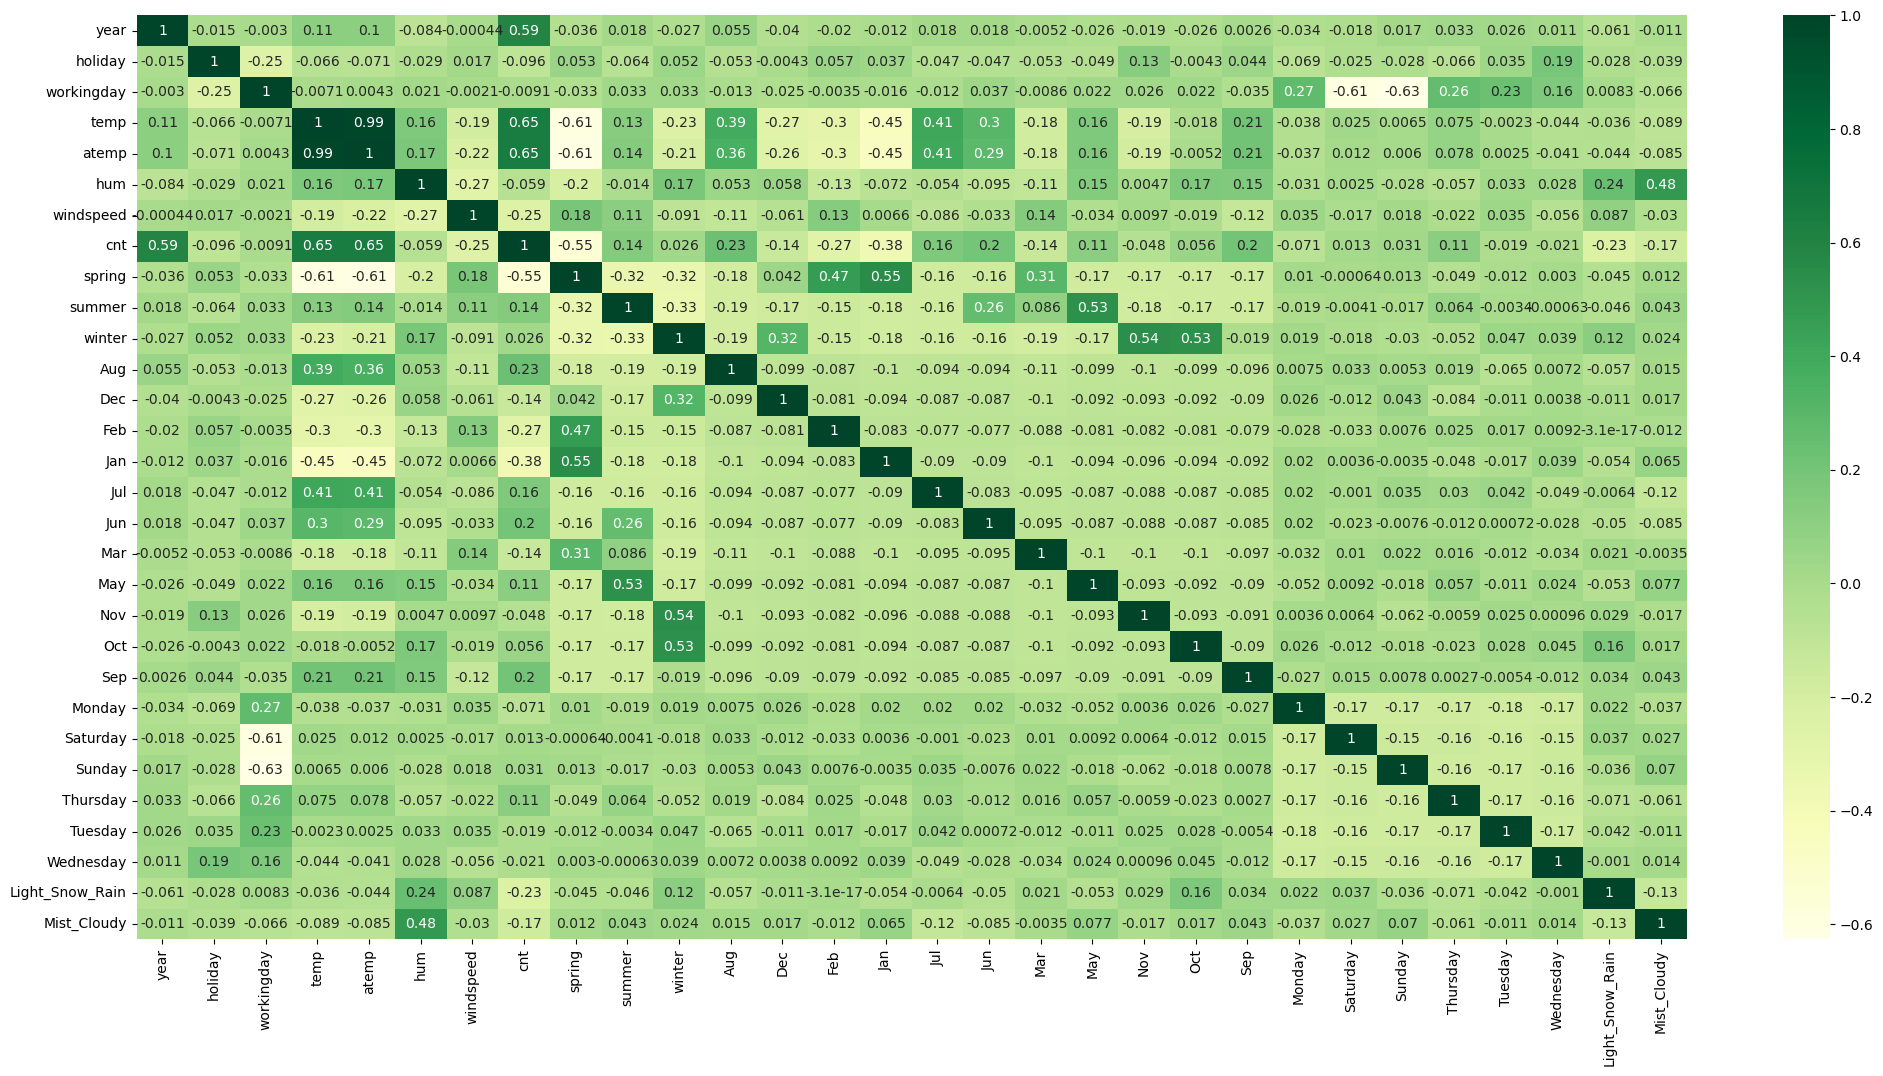

In [42]:
# Checking Correlation between these all variable
plt.figure (figsize=(25,12))
sns.heatmap (df_train.corr(), cmap='YlGn', annot=True)
plt.show()

**Observation:**
- High Correlation between cnt to year, temp, atemp & specific months

### 8. Dividing train dataset  into X and Y for model building

In [43]:
# Dividing /splitting daset into x & y

y_train = df_train.pop('cnt')
X_train = df_train

In [44]:
# Confirming shape of y_train, X_train

y_train.shape

(510,)

In [45]:
X_train.shape

(510, 29)

In [46]:
y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

In [47]:
X_train.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain,Mist_Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,1,0,0,0,0,1


### 9. Building Model- Multiple Linear Regression

**Approach for Model Development**

Running Multiple linear regression on all dataset and deleting columns one by one it will be time consuming, So we using here RFE (Recursive Feature Elimination) model removes the unwanted features/columns. So we get result with top variables. 

#### RFE (Recursive Feature Elimination) : 

In [48]:
# Creating Linear regression instance
lm= LinearRegression()

# Fitting model x_train, y_train
lm.fit(X_train, y_train)

# Creating RFE 
rfe= RFE(lm, n_features_to_select=15)

# Converting rfe to fitted rfe here
rfe= rfe.fit (X_train, y_train)

In [49]:
# Result of rfe
rfe_table= pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), columns= ['Feature', 'Support', 'Rank'])

rfe_table.sort_values(by= 'Rank', ascending=True)

,Feature,Support,Rank
0,year,True,1
20,Sep,True,1
18,Nov,True,1
27,Light_Snow_Rain,True,1
13,Jan,True,1
11,Dec,True,1
9,winter,True,1
8,summer,True,1
14,Jul,True,1
6,windspeed,True,1


#### Extract 15 most index col. from train set

In [50]:
rfe_15_col = rfe_table [rfe_table ['Support'] == True]

In [51]:
# Checking rfe top 15 variable
rfe_15_col

,Feature,Support,Rank
0,year,True,1
1,holiday,True,1
3,temp,True,1
5,hum,True,1
6,windspeed,True,1
7,spring,True,1
8,summer,True,1
9,winter,True,1
11,Dec,True,1
13,Jan,True,1


In [52]:
# Column name in To list
rfe_15_col_list = rfe_15_col ['Feature'].tolist()
rfe_15_col_list

['year',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'Dec',
 'Jan',
 'Jul',
 'Nov',
 'Sep',
 'Light_Snow_Rain',
 'Mist_Cloudy']

In [53]:
# Final Dataframe with 15 column created
X_train = X_train[rfe_15_col_list]

In [54]:
# Checking Final Dataframe with 15 column
X_train.head()

,year,holiday,temp,hum,windspeed,spring,summer,winter,Dec,Jan,Jul,Nov,Sep,Light_Snow_Rain,Mist_Cloudy
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


####  Model:1 Multiple Linear Regression using all 15 variable

In [55]:
# Add constant to X_train
X_train_lm = sm.add_constant (X_train)

# Performing Ordinary least square (OLS) regression model
mlr1 = sm.OLS (y_train, X_train_lm).fit()

mlr1.params

const              2800.548088
year               2002.671228
holiday            -791.745136
temp               4185.224862
hum               -1409.952374
windspeed         -1640.406262
spring             -532.426795
summer              367.992581
winter              885.894127
Dec                -308.224236
Jan                -377.327863
Jul                -480.233608
Nov                -336.390878
Sep                 655.962305
Light_Snow_Rain   -2142.413416
Mist_Cloudy        -471.977192
dtype: float64

In [56]:
mlr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          8.15e-189
Time:                        17:22:58   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2800.5481    313.638      8.929      0.000    2184.318    3416.778
year             2002.6712     70.301     28.487      0.000    1864.546    2140.797
holiday          -791.7451    222.606     -3.557      0.000   -1229.117    -354.373
temp             4185.2249    321.809     13.005      0.000    3552.941    4817.508
hum             -1409.9524    328.554     -4.291      0.000   -2055.488    -764.417
windspeed       -1640.4063    224.254     -7.315      0.000   -2081.016   -1199.797
spring           -532.4268    184.787     -2.881      0.004    -895.493    -169.361
summer            367.9926    133.261      2.761      0.006     106.164     629.821
winter            885.8941    156.623      5.656      0.000     578.164    1193.624
Dec              -308.2242    152.257     -2.024      0.043    -607.376      -9.073
Jan              -377.3279    157.664     -2.393      0.017    -687.103     -67.553
Jul              -480.2336    158.510     -3.030      0.003    -791.671    -168.796
Nov              -336.3909    163.550     -2.057      0.040    -657.730     -15.052
Sep               655.9623    146.875      4.466      0.000     367.385     944.539
Light_Snow_Rain -2142.4134    229.612     -9.331      0.000   -2593.550   -1691.277
Mist_Cloudy      -471.9772     90.863     -5.194      0.000    -650.503    -293.452
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Creating VIF (Varience Inflamation Factor) to check multicollinearity
# High VIF values indicate high multicollinearity.

vif= pd.DataFrame()
vif ['Features'] = X_train.columns
vif ['VIF']= [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round (vif['VIF'],2)
vif= vif.sort_values (by='VIF', ascending=False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,Mist_Cloudy,2.32
0,year,2.09
11,Nov,1.85
9,Jan,1.75


####  Model:2 Multiple Linear Regression using - exluding 'hum'

In [58]:
# Above VIF 'hum' is showing very high VIF.
# So dropping 'hum'

X_train.drop(['hum'], axis=1, inplace= True)

In [59]:
# Add Constant to X_train
X_train_lm = sm.add_constant(X_train)

# Performing OLS
mlr2 = sm.OLS(y_train, X_train_lm).fit()
mlr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          4.75e-186
Time:                        17:22:58   Log-Likelihood:                -4120.9
No. Observations:                 510   AIC:                             8272.
Df Residuals:                     495   BIC:                             8335.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2151.7943    279.592      7.696      0.000    1602.460    2701.128
year             2037.8822     71.038     28.687      0.000    1898.309    2177.456
holiday          -797.7182    226.484     -3.522      0.000   -1242.707    -352.729
temp             3813.3243    315.326     12.093      0.000    3193.783    4432.866
windspeed       -1377.5254    219.487     -6.276      0.000   -1808.767    -946.283
spring           -619.3661    186.877     -3.314      0.001    -986.535    -252.197
summer            303.2676    134.714      2.251      0.025      38.586     567.949
winter            755.1870    156.313      4.831      0.000     448.069    1062.305
Dec              -372.0714    154.171     -2.413      0.016    -674.982     -69.161
Jan              -434.6653    159.837     -2.719      0.007    -748.707    -120.623
Jul              -434.9981    160.917     -2.703      0.007    -751.164    -118.833
Nov              -343.4459    166.394     -2.064      0.040    -670.371     -16.521
Sep               597.3994    148.790      4.015      0.000     305.061     889.738
Light_Snow_Rain -2535.8856    214.182    -11.840      0.000   -2956.704   -2115.067
Mist_Cloudy      -695.9941     75.668     -9.198      0.000    -844.665    -547.323
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Performing VIF
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF']= [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round (vif['VIF'],2)
vif= vif.sort_values (by='VIF', ascending=False)
vif

,Feature,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,year,2.07
10,Nov,1.81
8,Jan,1.66
9,Jul,1.59
13,Mist_Cloudy,1.57


####  Model:3 Multiple Linear Regression using - exluding 'summer'

In [61]:
# Dropping 'summer' beasuse P-value is high among all

X_train.drop (['summer'], axis=1, inplace=True)

In [62]:
# Adding Constant
X_train_lm = sm.add_constant(X_train)

# Performing OLS
mlr3 = sm.OLS (y_train, X_train_lm).fit()
mlr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          4.08e-186
Time:                        17:22:58   Log-Likelihood:                -4123.5
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     496   BIC:                             8334.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2541.4003    220.489     11.526      0.000    2108.193    2974.608
year             2042.9445     71.293     28.656      0.000    1902.871    2183.018
holiday          -791.9229    227.396     -3.483      0.001   -1238.702    -345.144
temp             3492.9754    282.542     12.363      0.000    2937.849    4048.102
windspeed       -1335.5611    219.589     -6.082      0.000   -1767.001    -904.121
spring           -909.1542    136.025     -6.684      0.000   -1176.411    -641.897
winter            539.3859    123.973      4.351      0.000     295.808     782.963
Dec              -431.3651    152.526     -2.828      0.005    -731.043    -131.688
Jan              -483.7019    158.993     -3.042      0.002    -796.086    -171.318
Jul              -562.5377    151.231     -3.720      0.000    -859.670    -265.405
Nov              -407.6070    164.606     -2.476      0.014    -731.017     -84.197
Sep               464.3658    137.111      3.387      0.001     194.977     733.755
Light_Snow_Rain -2554.1516    214.904    -11.885      0.000   -2976.387   -2131.917
Mist_Cloudy      -693.3184     75.969     -9.126      0.000    -842.578    -544.058
==============================================================================
Omnibus:                       69.994   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.054
Skew:                          -0.690   Prob(JB):                     2.93e-40
Kurtosis:                       5.582   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# VIF
vif = pd.DataFrame()
vif['Feature']= X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round (vif['VIF'] , 2)
vif = vif.sort_values (by= 'VIF', ascending= False)
vif

,Feature,VIF
2,temp,4.67
3,windspeed,4.05
5,winter,2.55
4,spring,2.36
0,year,2.06
9,Nov,1.81
7,Jan,1.65
12,Mist_Cloudy,1.54
6,Dec,1.46
8,Jul,1.36


####  Model:4 Multiple Linear Regression using - exluding 'Nov'

In [64]:
# Dropping 'Nov' because hi p-value among all
X_train.drop(['Nov'], axis=1, inplace=True)

In [65]:
# Adding Constant to X_train
X_train_lm = sm.add_constant(X_train)

# Performing OLS
mlr4 = sm.OLS (y_train, X_train_lm).fit()
mlr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.3
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          5.72e-186
Time:                        17:22:58   Log-Likelihood:                -4126.7
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     497   BIC:                             8334.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2438.1194    217.623     11.203      0.000    2010.545    2865.694
year             2042.0033     71.659     28.496      0.000    1901.211    2182.795
holiday          -859.0052    226.940     -3.785      0.000   -1304.884    -413.126
temp             3637.5414    277.868     13.091      0.000    3091.600    4183.482
windspeed       -1336.8783    220.720     -6.057      0.000   -1770.537    -903.220
spring           -879.0832    136.180     -6.455      0.000   -1146.642    -611.524
winter            397.5272    110.509      3.597      0.000     180.404     614.651
Dec              -288.2656    141.882     -2.032      0.043    -567.028      -9.503
Jan              -441.2625    158.881     -2.777      0.006    -753.424    -129.101
Jul              -585.2800    151.729     -3.857      0.000    -883.390    -287.170
Sep               496.9008    137.182      3.622      0.000     227.372     766.430
Light_Snow_Rain -2515.9910    215.455    -11.678      0.000   -2939.306   -2092.676
Mist_Cloudy      -684.7493     76.281     -8.977      0.000    -834.621    -534.877
==============================================================================
Omnibus:                       62.396   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.665
Skew:                          -0.640   Prob(JB):                     1.92e-33
Kurtosis:                       5.335   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Performing VIF
vif= pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif = vif.sort_values (by='VIF', ascending=False)
vif

,Feature,VIF
2,temp,4.63
3,windspeed,4.01
4,spring,2.36
0,year,2.06
5,winter,1.64
7,Jan,1.64
11,Mist_Cloudy,1.54
8,Jul,1.36
6,Dec,1.29
9,Sep,1.20


####  Model:5 Multiple Linear Regression using - exluding 'Dec'

In [67]:
# Dropping 'Dec' because high p-value among all
X_train.drop(['Dec'], axis=1, inplace=True)

In [68]:
# Adding Constant
X_train_lm = sm.add_constant(X_train)

# Performing OLS
mlr5 = sm.OLS (y_train, X_train_lm).fit()
mlr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.7
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          2.87e-186
Time:                        17:22:59   Log-Likelihood:                -4128.8
No. Observations:                 510   AIC:                             8282.
Df Residuals:                     498   BIC:                             8332.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2343.4130    213.239     10.990      0.000    1924.454    2762.372
year             2042.5896     71.883     28.415      0.000    1901.358    2183.821
holiday          -844.6693    227.541     -3.712      0.000   -1291.728    -397.611
temp             3751.6766    272.984     13.743      0.000    3215.335    4288.018
windspeed       -1286.6411    220.018     -5.848      0.000   -1718.919    -854.363
spring           -892.9159    136.436     -6.545      0.000   -1160.977    -624.855
winter            354.6861    108.819      3.259      0.001     140.885     568.488
Jan              -374.6463    155.949     -2.402      0.017    -681.044     -68.248
Jul              -603.5640    151.937     -3.972      0.000    -902.080    -305.048
Sep               506.5334    137.530      3.683      0.000     236.322     776.745
Light_Snow_Rain -2492.4200    215.817    -11.549      0.000   -2916.444   -2068.396
Mist_Cloudy      -683.9448     76.519     -8.938      0.000    -834.284    -533.605
==============================================================================
Omnibus:                       58.688   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.828
Skew:                          -0.612   Prob(JB):                     1.18e-30
Kurtosis:                       5.233   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# VIF
vif=pd.DataFrame()
vif['Feature']= X_train.columns
vif['VIF']= [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF']= round (vif['VIF'],2)
vif = vif.sort_values (by='VIF', ascending=False)
vif

,Feature,VIF
2,temp,4.63
3,windspeed,4.01
4,spring,2.24
0,year,2.06
6,Jan,1.60
10,Mist_Cloudy,1.53
5,winter,1.39
7,Jul,1.36
8,Sep,1.20
9,Light_Snow_Rain,1.08


**Obseravation:**
- VIF & P- Values are under limit of Multicollinearity (Assumption of Linear Regression)
- In this model no.5 R-squared is 0.834, R-squared is 0.830, all p-values below the 0.05, VIF is also less than 5. 
- So we accepting current train Multiple Linear Regression to test.

-----------------------------------------------------------

### 10. Residual Analysis

In [70]:
# Adding Constant to dataframe
X_train_sm= sm.add_constant(X_train)

In [71]:
# Predicting y_train_pred using mlr5 & X_train
y_train_pred = mlr5.predict(X_train_sm)

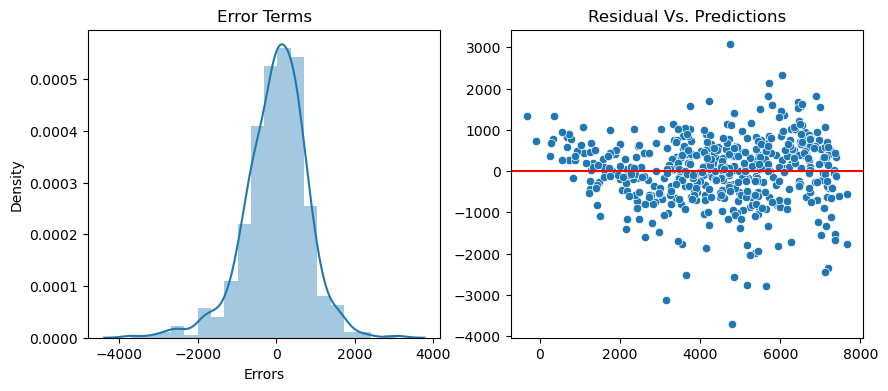

In [72]:
# Checking Normal Distribution of Error using plots
plt.figure (figsize= (10,4))

plt.subplot (1,2,1)
sns.distplot ((y_train-y_train_pred), bins=20)
plt.xlabel ('Errors')
plt.title ('Error Terms')

plt.subplot (1,2,2)
residuals=y_train-y_train_pred 
sns.scatterplot (y= residuals.values, x=y_train_pred.values)
plt.axhline(y=0, color='r')
plt.title ('Residual Vs. Predictions')
plt.show()

**Observation**:
- Error Terms are normally distributed with mean 0.
- Residual Mean is close to 0.
- Above reading/observations saying that our assumption of normal distribution of error mean is 0.

### 11. Making Prediction

#### Scaling on Test Dataset

In [73]:
# Applying scaler on all variable except yes-no and 'dummy' variable
# num_var = num_var = ['temp', 'windspeed']

df_test [num_var] = scaler.transform (df_test [num_var])

In [74]:
# Checking Scaler
df_test.describe()

,year,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain,Mist_Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,4560.559091,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,1904.968544,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,5913.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing Test Dataset

In [75]:
# Dividing Test Dataset y_test & X_test

y_test = df_test.pop('cnt')
X_test = df_test

In [76]:
# Checking X_test
X_test.head(2)

,year,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain,Mist_Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [77]:
# Checking Shape

print (y_test.shape)
print (X_test.shape)

(220,)
(220, 29)


####  Prediction

In [78]:
# Creating Variable X_test_new using X_train

X_test_new = X_test[X_train.columns]

In [79]:
# Adding Constant
X_test_new_c = sm.add_constant (X_test_new)

In [80]:
# Making Prediction 
y_test_pred = mlr5.predict (X_test_new_c)

In [81]:
### 12. Model Evaluation

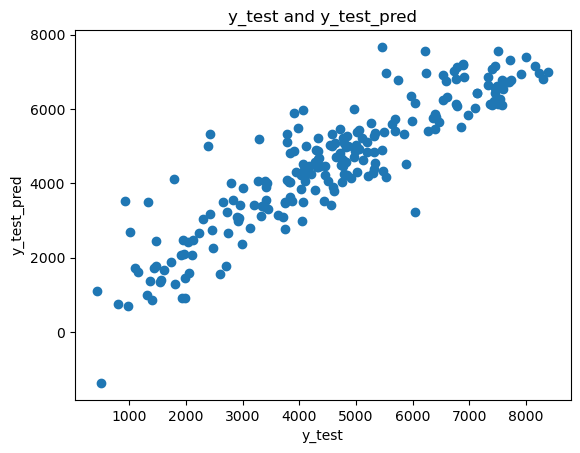

In [82]:
# Plotting the y_test and y_pred undertanding spead

plt.scatter (x= y_test, y= y_test_pred)
plt.title ('y_test and y_test_pred')
plt.xlabel ('y_test')
plt.ylabel ('y_test_pred')
plt.show()

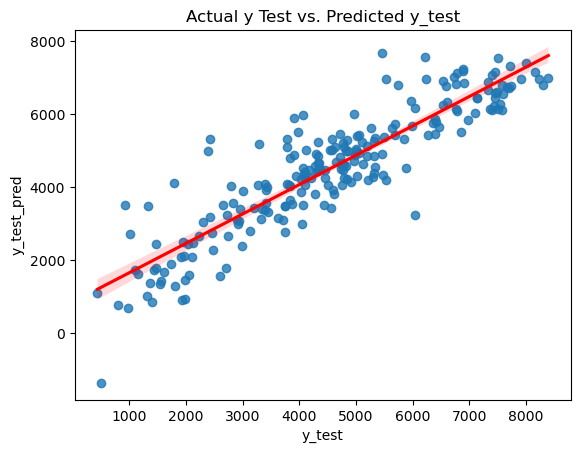

In [83]:
# Actual Vs Prected 

sns.regplot (x= y_test, y= y_test_pred, line_kws={'color':'Red'})
plt.title ('Actual y Test vs. Predicted y_test')
plt.xlabel ('y_test')
plt.ylabel ('y_test_pred')
plt.show()

**Obseravation:**
- Actual y Test vs. Predicted y_test showing strong best fit line
- Error terms also constant across the line.

#### R-Squared values

In [84]:
# R-Squared values for Test dataset

from sklearn.metrics import r2_score

r2_score(y_test, y_test_pred)

0.8040433012669321

In [85]:
# R-Squared values for train dataset
r2_score (y_train, y_train_pred)

0.8341250888288262

Diferance between Test dataset and train dataset is 0.0288, this is very less. So model is strong to prediction.

### 13. Regression Equation

In [86]:
# Parameter for Formula
mlr5.params

const              2343.413009
year               2042.589596
holiday            -844.669306
temp               3751.676594
windspeed         -1286.641055
spring             -892.915888
winter              354.686072
Jan                -374.646323
Jul                -603.564029
Sep                 506.533412
Light_Snow_Rain   -2492.420023
Mist_Cloudy        -683.944803
dtype: float64

--------------------------------------------------------------
**Equation for Prediction:**

   **Y = β₀ + β₁X₁ + β₂X₂ + ... + βᵢXᵢ**

    -Y : Dependent variable
    -β₀ : Intercept
    -β₁ : Slope for Xᵢ
    -X : Independent variable
--------------------------------------------------------------

 **Demand**= 
      2343.41 + (Year x 2042.58) + (Holiday x -844.66) + (Temperature x 3751.67) + (Windspeed x -1286.64) +  (spring x  -892.91) +  (Winter x 354.68) + (January x -374.64) + (July x -603.56) + (September x 506.53) + (Light_Snow_Rain x -2492.42) + (Mist_Cloudy x -683.94)

----------------------------------------------------------------

**Variables Significant in predicting the shared bike demand:**

*Top 5 Variables:*

1) Temperature
2) Light Snow Rain  
3) Year
4) Windspeed
5) Holiday


### 14. Model Explaination:

- In this model if all variable are 0, demand will be 2343.41
- Each additional year, the demand increases by 2042.58 units, assuming all other factors remain constant.
- When it's a holiday (Holiday = 1), the demand decreases by 844.66 units compared to non-holidays .
- Increase in the 'Temperature' variable by one unit the bike hire numbers will increases by  3751.67 units.
- Increase in the 'Windspeed' variable by one unit the bike hire numbers will decreases by -1286.64 units.
- In the spring season demand is lower by 892.91.
- In the 'winter' season the bike hire numbers will increases by 354.68 units.
- In the 'January' season the bike hire numbers will decreases by 374.64 units.
- In the 'July'season the bike hire numbers will decreases by 603.56 units.
- In the 'Light_Snow_Rain' situation the bike hire numbers will decreases by 2492.42 units.
- In the 'Mist_Cloudy' situation the bike hire numbers will decreases by 683.94 units.

### 15. Recommendations📎:

1) Temperature: Monitor weather forecasts and prepare for higher demand on warmer days. This may include increasing staff levels, stock, and resources to accommodate higher customer turnout.
2) Year: As demand grows each year, gradually allocate more resources and improve infrastructure to keep up with the increasing demand.
3) Windspeed: When windy condition, expect fewer customers. To counter this, try running promotions related to wind or host indoor events to attract customers regardless of the weather.
4) Light Snow/Rain: When it’s snowy or rainy, expect fewer customers. To counter this, try offering delivery services, hosting indoor activities, or providing weather-related discounts to attract customers who might otherwise stay home.
5) Holiday: Develop strategies to boost demand during holidays, such as special promotions, discounts, or holiday-themed events to mitigate the decrease in demand.

                                                          ***